In [1]:
import pandas as pd
df = pd.read_csv ('bike.tsv', sep='\t')
print(df.shape)
df.head(2)

(731, 6)


,dteday,holiday,weekday,workingday,weather_id,cnt
0,2011-01-01,0,6,0,2,985
1,2011-01-02,0,0,0,2,801


In [251]:
weather = pd.read_csv('weather.csv')
weather

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


In [252]:
tmp = pd.read_json('temp.json')
tmp = tmp.T
tmp

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869
...,...,...,...,...,...
725,0.226642,2012-12-27,0.652917,0.254167,0.350133
726,0.255046,2012-12-28,0.59,0.253333,0.155471
727,0.2424,2012-12-29,0.752917,0.253333,0.124383
728,0.2317,2012-12-30,0.483333,0.255833,0.350754


In [253]:
df2 = df.merge(weather, how = 'inner', on = 'weather_id')
df2.groupby('weather').mean(numeric_only = True)['cnt']

weather
晴れ    4876.786177
曇り    4052.672065
雨     1803.285714
Name: cnt, dtype: float64

In [254]:
df2

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
0,2011-01-01,0,6,0,2,985,曇り
1,2011-01-02,0,0,0,2,801,曇り
2,2011-01-03,0,1,1,1,1349,晴れ
3,2011-01-04,0,2,1,1,1562,晴れ
4,2011-01-05,0,3,1,1,1600,晴れ
...,...,...,...,...,...,...,...
726,2012-12-27,0,4,1,2,2114,曇り
727,2012-12-28,0,5,1,2,3095,曇り
728,2012-12-29,0,6,0,2,1341,曇り
729,2012-12-30,0,0,0,1,1796,晴れ


In [255]:
df2[~df2['dteday'].isin(tmp['dteday'])]

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
200,2011-07-20,0,3,1,1,4332,晴れ


In [256]:
df3 = df2.merge(tmp, how = 'left', on = 'dteday')
df3[df3['dteday']=='2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
200,2011-07-20,0,3,1,1,4332,晴れ,NaN,NaN,NaN,NaN


<Axes: >

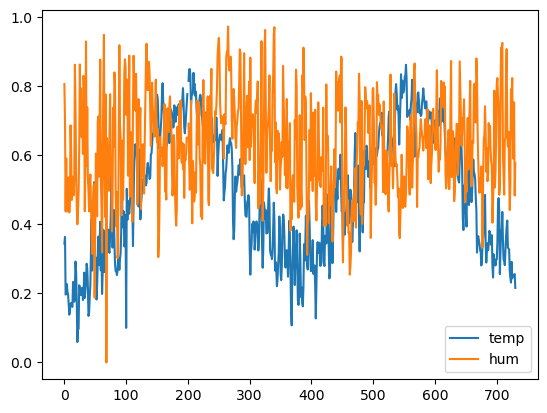

In [257]:
df3[['temp', 'hum']].plot(kind = 'line')

<Axes: ylabel='Frequency'>

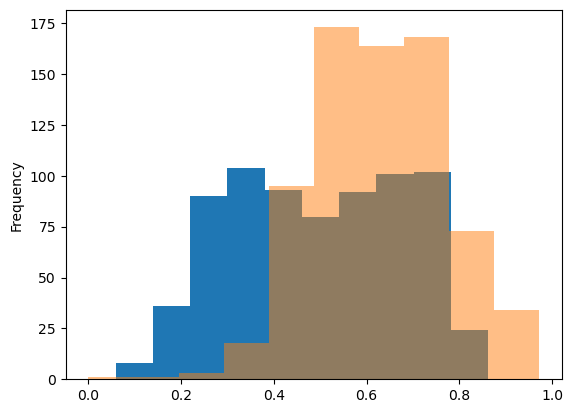

In [258]:
df3['temp'].plot(kind = 'hist')

df3['hum'].plot(kind = 'hist', alpha = 0.5)

<Axes: >

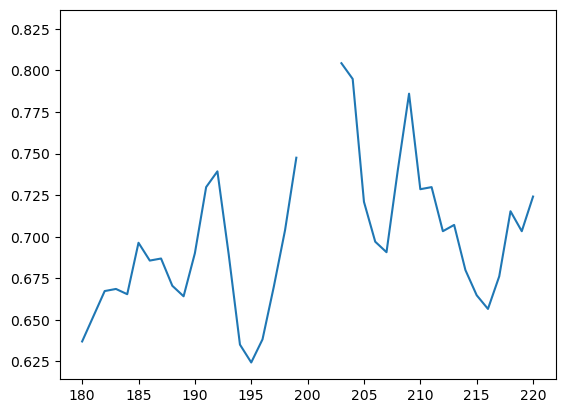

In [259]:
df3.loc[180:220,'atemp'].plot(kind='line')

<Axes: >

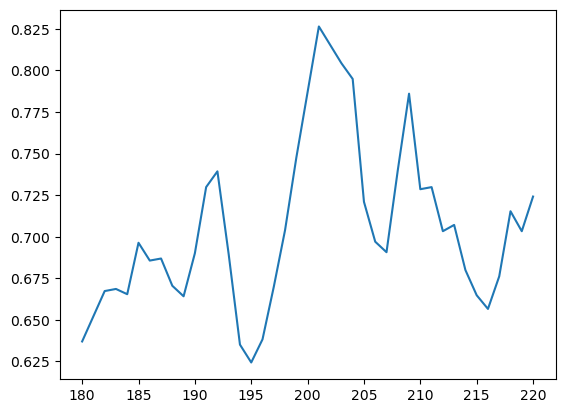

In [260]:
df3['atemp'] = df3['atemp'].astype(float)
df3['atemp'] =df3['atemp'].interpolate()
df3.loc[180:220, 'atemp'].plot(kind='line')

In [261]:
iris_df = pd.read_csv('iris.csv')
dummied = pd.get_dummies(iris_df['種類'], drop_first=True, dtype=int)
iris_df = pd.concat([iris_df, dummied], axis=1)
iris_df = iris_df.drop(columns='種類')
iris_df_fill = iris_df.dropna()

iris_df_fill

,がく片長さ,がく片幅,花弁長さ,花弁幅,Iris-versicolor,Iris-virginica
0,0.22,0.63,0.08,0.04,0,0
1,0.17,0.42,0.35,0.04,0,0
2,0.11,0.50,0.13,0.04,0,0
3,0.08,0.46,0.26,0.04,0,0
4,0.19,0.67,0.44,0.04,0,0
...,...,...,...,...,...,...
144,0.67,0.54,0.70,0.72,0,1
145,0.67,0.42,0.54,0.92,0,1
146,0.56,0.21,0.69,0.46,0,1
148,0.53,0.58,0.63,0.92,0,1


In [262]:
x = iris_df_fill.drop(columns='がく片長さ')
t = iris_df_fill['がく片長さ']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
no_df = iris_df[iris_df['がく片長さ'].isnull()].drop(columns='がく片長さ')
model.fit(x,t)
pred = model.predict(no_df)

iris_df.loc[iris_df['がく片長さ'].isnull(),'がく片長さ'] = pred
iris_df.loc[iris_df['がく片長さ'].isnull(),'がく片長さ']

Series([], Name: がく片長さ, dtype: float64)

In [263]:
iris_df.isnull().any()

がく片長さ              False
がく片幅                True
花弁長さ                True
花弁幅                 True
Iris-versicolor    False
Iris-virginica     False
dtype: bool

In [264]:
df3

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
0,2011-01-01,0,6,0,2,985,曇り,0.363625,0.805833,0.344167,0.160446
1,2011-01-02,0,0,0,2,801,曇り,0.353739,0.696087,0.363478,0.248539
2,2011-01-03,0,1,1,1,1349,晴れ,0.189405,0.437273,0.196364,0.248309
3,2011-01-04,0,2,1,1,1562,晴れ,0.212122,0.590435,0.2,0.160296
4,2011-01-05,0,3,1,1,1600,晴れ,0.229270,0.436957,0.226957,0.1869
...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,0,4,1,2,2114,曇り,0.226642,0.652917,0.254167,0.350133
727,2012-12-28,0,5,1,2,3095,曇り,0.255046,0.59,0.253333,0.155471
728,2012-12-29,0,6,0,2,1341,曇り,0.242400,0.752917,0.253333,0.124383
729,2012-12-30,0,0,0,1,1796,晴れ,0.231700,0.483333,0.255833,0.350754


In [270]:
from sklearn.covariance import MinCovDet
model = MinCovDet(random_state=0, support_fraction=0.7)
df4 = df3.loc[:, 'atemp':'windspeed'].dropna()
model.fit(df4)
distance = model.mahalanobis(df4)
distance

array([5.28685919e+00, 2.93958299e+00, 1.08873903e+01, 3.91777267e+00,
       5.83743181e+00, 6.85979161e+00, 4.57807325e+00, 1.12294313e+01,
       3.07879561e+01, 1.07350024e+01, 4.93484073e+00, 1.74968772e+01,
       1.87331329e+01, 5.32729180e+00, 3.61541859e+00, 4.80173345e+00,
       8.21213444e+00, 6.79836643e+00, 2.87299048e+00, 5.25717722e+00,
       2.34832751e+01, 1.17927956e+01, 1.49622820e+01, 8.00089913e+00,
       3.82116490e+00, 2.10012092e+01, 4.47041230e+00, 5.45651259e+00,
       3.90883119e+00, 7.18467288e+00, 6.26114495e+00, 1.11698504e+01,
       8.91683812e+00, 1.31862666e+01, 3.78816752e+00, 9.40980352e+00,
       2.37017046e+00, 9.05455392e+00, 2.15907661e+01, 8.24295918e+00,
       9.58859635e+00, 5.84834138e+00, 3.26204050e+00, 4.28450181e+00,
       1.48613074e+01, 1.14032754e+01, 4.13782899e+00, 1.84042916e+00,
       4.70582846e+00, 3.26061846e+01, 5.97687800e+00, 1.00266113e+01,
       6.60674933e+00, 8.23738671e+00, 4.97949164e+00, 9.40472950e+00,
      

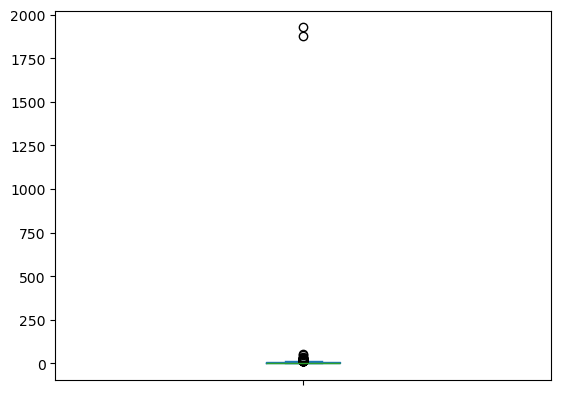

In [266]:
distance = pd.Series(distance)
distance.plot(kind='box')
df4['distance'] = distance

In [267]:
dis_des = distance.describe()
dis_des

count     730.000000
mean       10.627559
std        99.403456
min         0.187189
25%         2.311196
50%         3.802735
75%         6.554506
max      1927.352267
dtype: float64

In [268]:
iqr = dis_des['75%'] - dis_des['25%']
jogen = dis_des['75%'] + (iqr)*1.5
kagen = dis_des['25%'] - (iqr)*1.5
outliner = distance[(distance<kagen)|(distance>jogen)]
outliner

8        30.787956
11       17.496877
12       18.733133
20       23.483275
22       14.962282
25       21.001209
33       13.186267
38       21.590766
44       14.861307
49       32.606185
64       16.674029
65       16.809630
68       25.037268
77       13.417109
89       14.423018
100    1927.352267
105      13.166850
200      55.610638
201      14.164660
206      13.194839
237      15.210330
248      14.082230
249      27.571029
250      19.025119
263      23.080048
264      45.737514
266      15.769188
268      13.735069
291      16.174853
300      30.115803
365      14.522407
366      30.771500
376      18.737756
381      21.123075
384      12.979329
385      13.452365
405      15.068717
406      38.771470
419      27.244647
431      23.912297
432      14.113163
463      13.001305
471      13.608394
593    1878.348913
625      18.385930
665      13.941376
666      15.629783
692      21.351284
699      15.388077
719      14.674746
720      24.727324
724      23.899808
725      22.

In [273]:
outliner.index

Index([  8,  11,  12,  20,  22,  25,  33,  38,  44,  49,  64,  65,  68,  77,
        89, 100, 105, 200, 201, 206, 237, 248, 249, 250, 263, 264, 266, 268,
       291, 300, 365, 366, 376, 381, 384, 385, 405, 406, 419, 431, 432, 463,
       471, 593, 625, 665, 666, 692, 699, 719, 720, 724, 725, 728],
      dtype='int64')

In [274]:
df4.drop(index=outliner.index)

KeyError: '[200] not found in axis'